In [1]:
!pip install arch

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt
from arch import arch_model
import statsmodels.api as sm

In [25]:
df = pd.read_excel('C:/Users/Jasmin Hirani/Desktop/Time series market Analysis Agmarknet/Onion.xlsx') 

In [26]:
df['Price Date'] = pd.to_datetime(df['Price Date'])
df.set_index('Price Date', inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3073 entries, 2023-10-06 to 2010-01-01
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Modal Price (Rs./Quintal)  3073 non-null   int64 
 1   Variety                    3073 non-null   object
dtypes: int64(1), object(1)
memory usage: 72.0+ KB


,Modal Price (Rs./Quintal),Variety
Price Date,,
2023-10-06,2300,Other
2023-10-05,2250,Other
2023-10-04,2200,Other
2023-10-03,2000,Other
2023-10-02,2100,Other


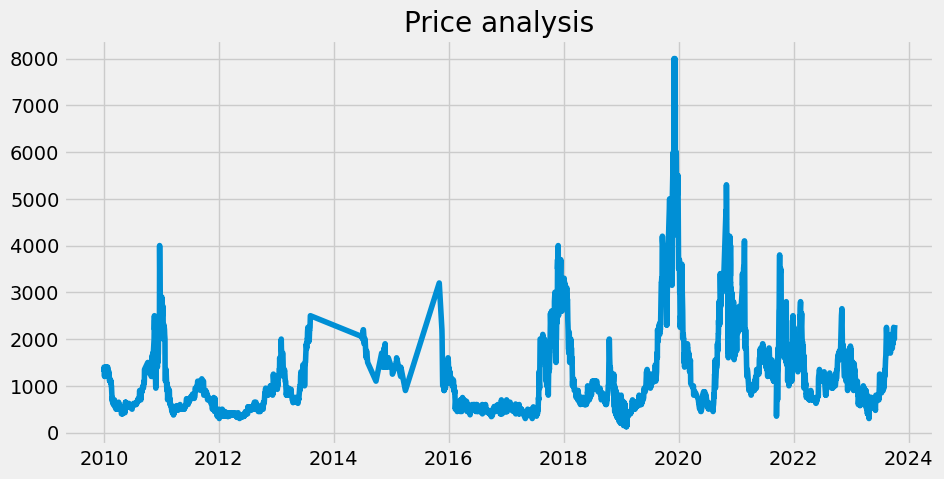

In [27]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['Modal Price (Rs./Quintal)'])
plt.title('Price analysis')
plt.grid(True)
plt.show();

In [28]:
df.describe()

,Modal Price (Rs./Quintal)
count,3073.000000
mean,1213.377807
std,919.849604
min,125.000000
25%,590.000000
50%,900.000000
75%,1550.000000
max,8000.000000


In [29]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Modal Price (Rs./Quintal)'])
test_result

(-4.078910191276321,
 0.00104925466144086,
 10,
 3062,
 {'1%': -3.432487423419325,
  '5%': -2.8624843785195684,
  '10%': -2.567272716320792},
 41452.131546012104)

In [30]:
from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(df['Modal Price (Rs./Quintal)'].diff().dropna())
test_result1

(-19.399602682110146,
 0.0,
 9,
 3062,
 {'1%': -3.432487423419325,
  '5%': -2.8624843785195684,
  '10%': -2.567272716320792},
 41451.887048317505)

C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


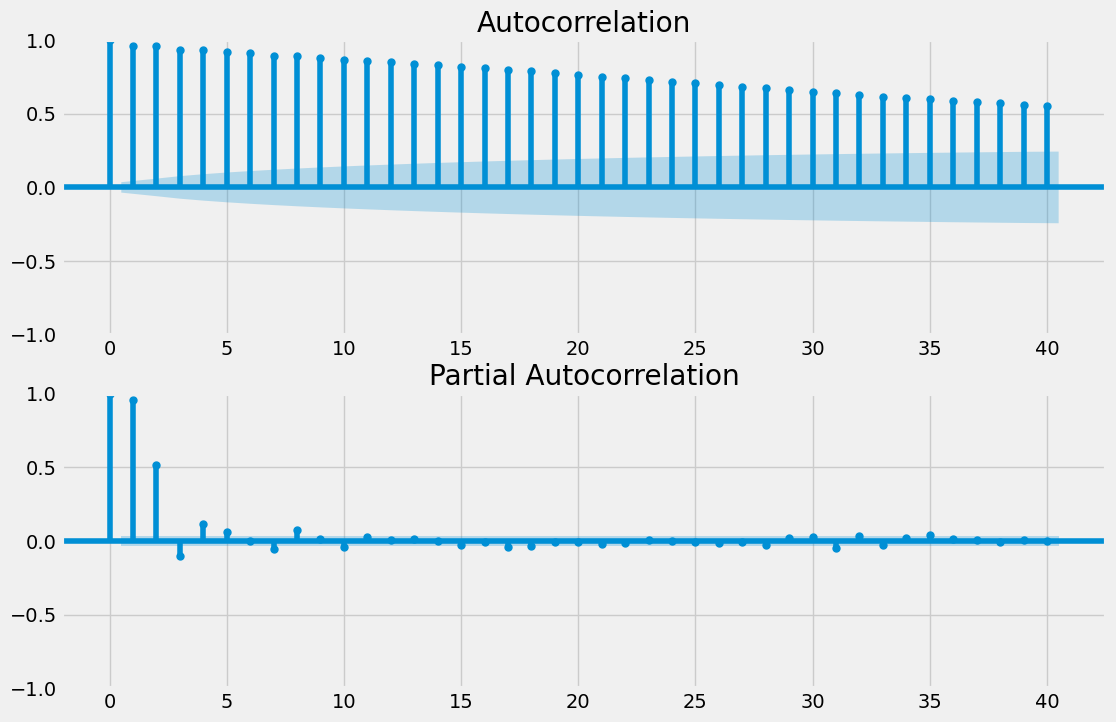

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Modal Price (Rs./Quintal)'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Modal Price (Rs./Quintal)'], lags=40, ax=ax2)
plt.show()

C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


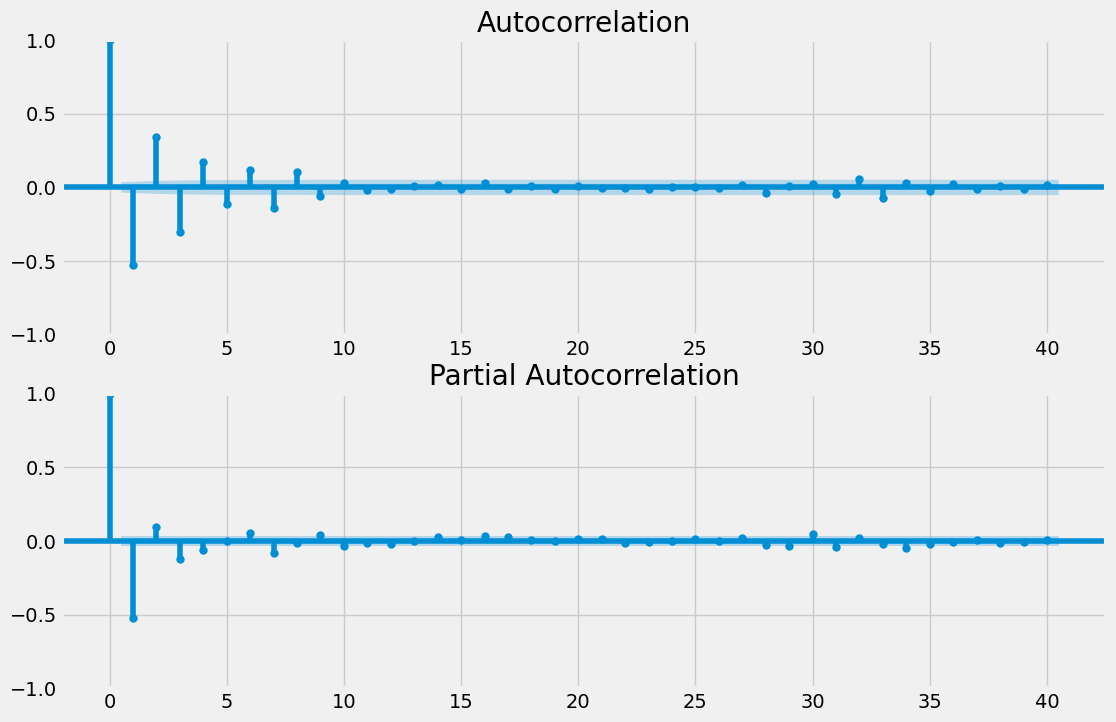

In [32]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['Modal Price (Rs./Quintal)'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Modal Price (Rs./Quintal)'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [33]:
train = df.iloc[:len(df)-0] 
test = df.iloc[len(df)-10:] 

In [34]:
order = (1, 0, 0)  # ARIMA(1,0,0)
arima_model = sm.tsa.ARIMA(df['Modal Price (Rs./Quintal)'], order=order)
arima_results = arima_model.fit()

# Obtain the residuals from the fitted results
residuals = arima_results.resid

C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:

In [35]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch

# Perform the LM test for lag correlation at the second order (ARCH effect)
# Perform the LM test for lag correlation at the second order (ARCH effect)
num_lags = 2  # Test up to the second lag
lm_test_result = het_arch(residuals, nlags=num_lags)
# Extract the test statistic and p-value
test_statistic, p_value, f_statistic, f_p_value = lm_test_result

print(f"LM Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Check if the test is significant (p-value < alpha, where alpha is your significance level)
alpha = 0.05  # You can adjust the significance level as needed
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence of lag correlation (ARCH effect).")
else:
    print("Fail to reject the null hypothesis: There is no evidence of lag correlation (ARCH effect).")

LM Test Statistic: 1134.3226604315814
P-Value: 4.841321660188551e-247
Reject the null hypothesis: There is evidence of lag correlation (ARCH effect).


In [18]:
from arch import arch_model
am = arch_model(train['Modal Price (Rs./Quintal)'], mean='AR', lags = 1, vol='GARCH', p=1, o=0, q=1)
#am = arch_model(df['price'], mean='Zero', vol='EGARCH', p=1, o=0, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                               AR - GARCH Model Results                              
Dep. Variable:     Modal Price (Rs./Quintal)   R-squared:                       0.920
Mean Model:                               AR   Adj. R-squared:                  0.920
Vol Model:                             GARCH   Log-Likelihood:               -19171.0
Distribution:                         Normal   AIC:                           38352.0
Method:                   Maximum Likelihood   BIC:                           38382.2
                                               No. Observations:                 3072
Date:                       Wed, Oct 11 2023   Df Residuals:                     3070
Time:                               14:45:57   Df Model:                            2
                                 Mean Model                                
                    coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------------------------------------

C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.724e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [19]:
# Perform residual tests and analysis
residuals = res.resid
residuals

Price Date
2023-10-06           NaN
2023-10-05     -3.865829
2023-10-04     -5.218395
2023-10-03   -156.570962
2023-10-02    138.018773
                 ...    
2010-01-06     19.082846
2010-01-05    -80.917154
2010-01-04    116.377714
2010-01-02    119.082846
2010-01-01    -78.212021
Name: resid, Length: 3073, dtype: float64

C:\Users\Jasmin Hirani\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.724e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


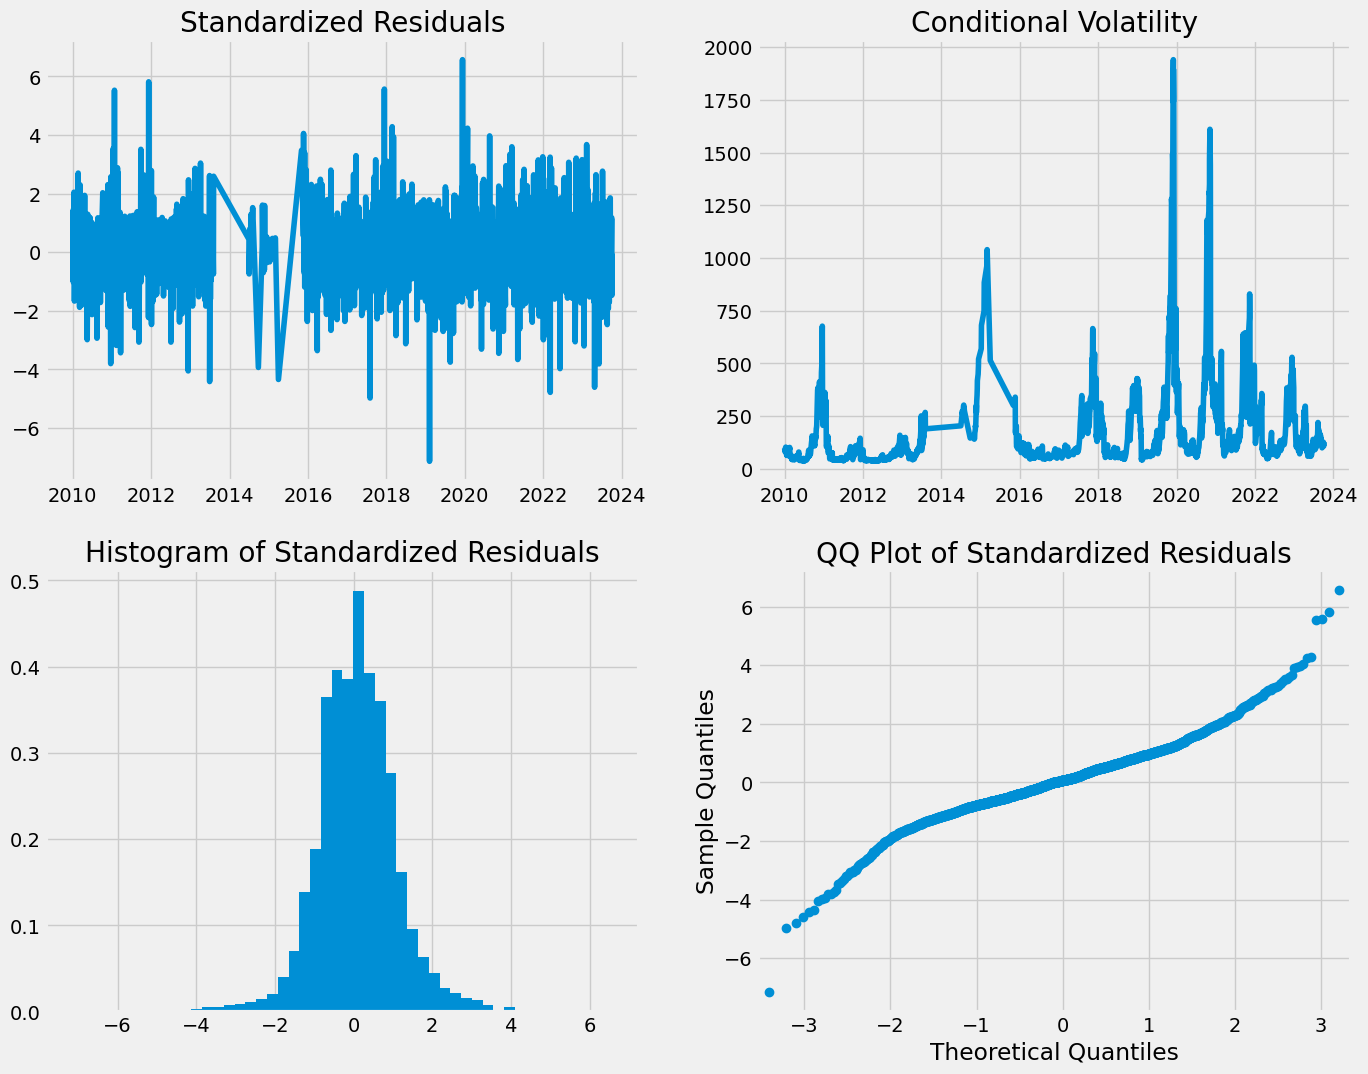

In [20]:
from arch import arch_model
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit your GARCH model
am = arch_model(train['Modal Price (Rs./Quintal)'], mean='AR', lags=1, vol='GARCH', p=1, o=0, q=1)
res = am.fit(update_freq=5, disp='off')

# Generate model diagnostics and plots manually
# You can create your own diagnostic plots using the fitted results
# For example, you can check the standardized residuals, conditional volatility, and other diagnostics
std_residuals = res.resid / res.conditional_volatility
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.plot(std_residuals)
plt.title('Standardized Residuals')
plt.subplot(2, 2, 2)
plt.plot(res.conditional_volatility)
plt.title('Conditional Volatility')
plt.subplot(2, 2, 3)
plt.hist(std_residuals, bins=50, density=True)
plt.title('Histogram of Standardized Residuals')
plt.subplot(2, 2, 4)
sm.qqplot(std_residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Standardized Residuals')
plt.show()

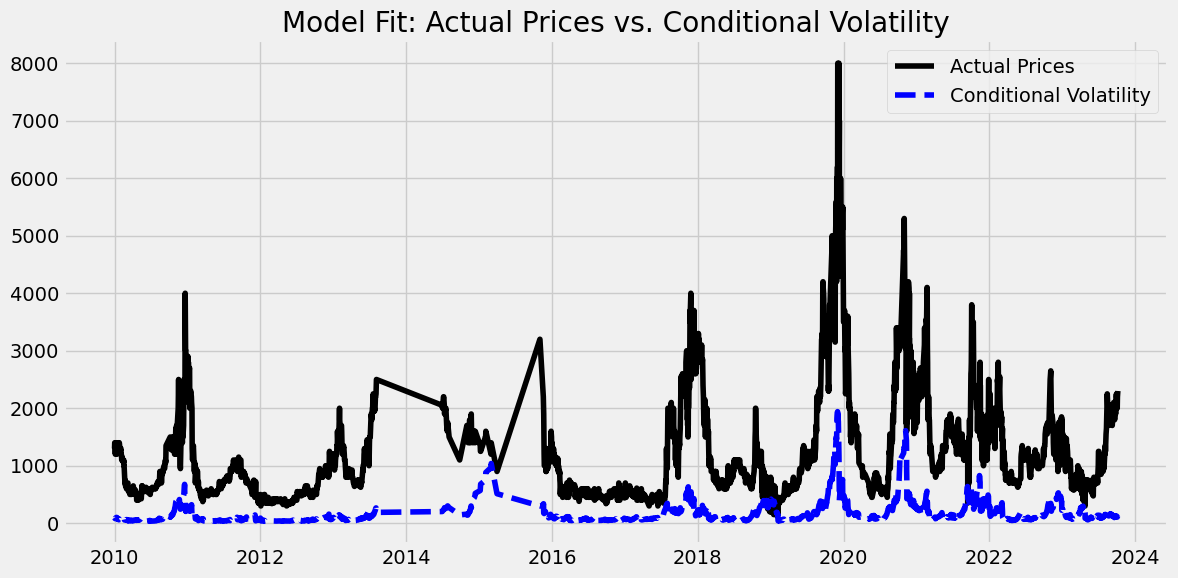

In [21]:
from arch import arch_model

# Plot the model's conditional mean and conditional volatility predictions
fig = plt.figure(figsize=(12, 6))

plt.plot(train['Modal Price (Rs./Quintal)'], label='Actual Prices', linestyle='-', color='black')
plt.plot(res.conditional_volatility, label='Conditional Volatility', linestyle='--', color='blue')
plt.title('Model Fit: Actual Prices vs. Conditional Volatility')
plt.legend()


plt.tight_layout()
plt.show()

In [22]:
forecast_horizon = 10  # Change this to your desired forecast horizon
forecast = res.forecast(start=None, horizon=forecast_horizon)

In [23]:
print(forecast.mean.iloc[-3:])
print(forecast.residual_variance.iloc[-3:])
print(forecast.variance.iloc[-3:])

                   h.01         h.02         h.03         h.04         h.05  \
Price Date                                                                    
2010-01-01  1280.917154  1262.350524  1244.286146  1226.710434  1209.610167   

                   h.06         h.07         h.08         h.09         h.10  
Price Date                                                                   
2010-01-01  1192.972486  1176.784876  1161.035162  1145.711499  1130.802361  
                   h.01         h.02         h.03         h.04         h.05  \
Price Date                                                                    
2010-01-01  8799.425811  8961.194935  9122.964059  9284.733182  9446.502306   

                   h.06         h.07         h.08        h.09          h.10  
Price Date                                                                   
2010-01-01  9608.271429  9770.040553  9931.809677  10093.5788  10255.347924  
                   h.01          h.02          h.03     